In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
import train_mask_detector as made

In [3]:
dataset = 'dataset'
Batch_Size = 16
Valid_Size = 0.2
Epochs = 10
Lr = 0.005
classes = ['wm', 'wom']
Save_model = 'models/mask_detector.pt'

In [4]:
train_loader, valid_loader = made.loaders(dataset, Valid_Size, Batch_Size)

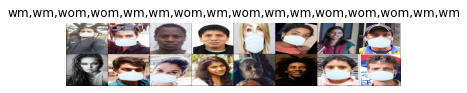

In [5]:
made.imshow(train_loader, classes)

In [6]:
model = made.load_model(classes)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), Lr, momentum=0.9)

198866844, Acc:16/16
Batch:57, Loss:0.05080122873187065, Acc:16/16
Batch:58, Loss:0.10282333940267563, Acc:15/16
Batch:59, Loss:0.054010845720767975, Acc:16/16
Batch:60, Loss:0.1472966969013214, Acc:15/16
Batch:61, Loss:0.08645812422037125, Acc:15/16
Batch:62, Loss:0.023425202816724777, Acc:16/16
Batch:63, Loss:0.003682699054479599, Acc:16/16
Batch:64, Loss:0.004094650037586689, Acc:16/16
Batch:65, Loss:0.0709165632724762, Acc:15/16
Batch:66, Loss:0.024947727099061012, Acc:16/16
Batch:67, Loss:0.03439393267035484, Acc:16/16
Batch:68, Loss:0.041792597621679306, Acc:13/16
Epoch:3, Loss:0.0978398668728229, Acc:15
Batch:0, Loss:0.25452831387519836, Acc:14/16
Batch:1, Loss:0.019504619762301445, Acc:16/16
Batch:2, Loss:0.08083457499742508, Acc:16/16
Batch:3, Loss:0.025278884917497635, Acc:16/16
Batch:4, Loss:0.1269911527633667, Acc:15/16
Batch:5, Loss:0.02329917997121811, Acc:16/16
Batch:6, Loss:0.038797639310359955, Acc:16/16
Batch:7, Loss:0.07538097351789474, Acc:15/16
Batch:8, Loss:0.0121

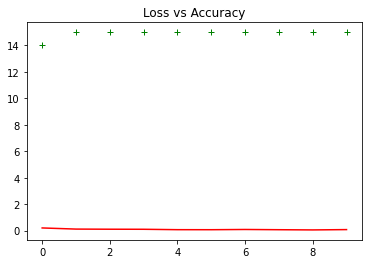

In [7]:
made.train(model, criterion, optim, train_loader, Epochs, Lr, Batch_Size, verbose=True)

In [8]:
made.infer(model, valid_loader, itr=1, verbose=True)

Predictions:
tensor([[ 2.3153, -2.8157],
        [ 3.4998, -3.6239],
        [-5.8044,  5.7043],
        [-6.1841,  6.0008],
        [ 3.2899, -3.6427],
        [-3.7512,  3.3422],
        [-2.0895,  1.5829],
        [ 5.8761, -6.2731],
        [-6.3062,  6.0996],
        [-2.3706,  2.1719],
        [ 4.9347, -5.0852],
        [-4.5385,  4.0223],
        [ 4.3381, -4.7209],
        [-5.5134,  5.3695],
        [ 4.2971, -4.7108],
        [-5.9995,  5.3718]], grad_fn=<AddmmBackward>)
Final Predictions:tensor([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])
Ground truth     :tensor([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])


In [9]:
torch.save(model.state_dict(), Save_model)

In [7]:
model.load_state_dict(torch.load(Save_model))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [8]:
made.infer(model, valid_loader, itr=10, verbose=True)

Predictions:
tensor([[-4.0768,  3.4958],
        [-5.1294,  4.8152],
        [ 1.6674, -1.7728],
        [-5.7259,  5.3896],
        [ 4.8361, -5.1716],
        [ 8.2767, -8.4786],
        [-4.5385,  4.0223],
        [-5.7461,  5.2678],
        [ 6.7255, -7.0377],
        [ 1.3370, -1.4084],
        [ 3.7966, -3.8995],
        [ 6.5327, -6.2065],
        [ 3.9849, -4.2091],
        [-6.2301,  6.0114],
        [-7.0733,  6.6446],
        [-3.4542,  3.2474]], grad_fn=<AddmmBackward>)
Final Predictions:tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])
Ground truth     :tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])
Predictions:
tensor([[ 0.2657, -0.5826],
        [ 5.5959, -5.6405],
        [ 1.6559, -1.8578],
        [-5.8044,  5.7043],
        [ 2.4279, -2.6412],
        [ 6.8272, -6.6295],
        [-1.6416,  1.3862],
        [ 1.5378, -1.8276],
        [ 7.0342, -7.0070],
        [-3.5238,  2.9783],
        [ 6.3733, -6.5843],
        [-7.1420,  6.6852],
        [-2.87

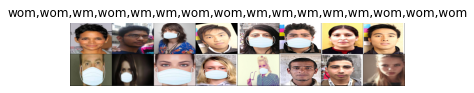

In [9]:
made.imshow(valid_loader, classes)

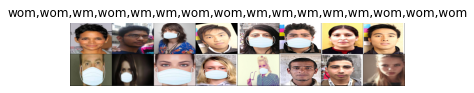

tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])
tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])


In [12]:
images, labels = next(iter(valid_loader))

plt_images = torchvision.utils.make_grid(images)

plt.imshow(plt_images.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(','.join([classes[i.item()] for i in labels]))
plt.show()

print(labels)

out = model(images)
_, preds = torch.max(out, 1)
print(preds)